In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize, word_tokenize

import string, warnings, urllib3, locale

warnings.filterwarnings('ignore')
locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')

'es_ES.UTF-8'

In [2]:
Punct_List = dict((ord(punct), None) for punct in string.punctuation + '¿¡')

def TxNormalize(text):
    
    return word_tokenize(text.lower().translate(Punct_List))

def respuesta(texto):
    Tokens_List.append(texto)
    TfidfVec = TfidfVectorizer(tokenizer = TxNormalize) 
    tfidf = TfidfVec.fit_transform(Tokens_List)
    Tokens_List.remove(texto)
    vals = cosine_similarity(tfidf[-1], tfidf)
    flat = vals.flatten()
    flat.sort()
    
    return Tokens_List[vals.argsort()[0][-2]]

def nice_axes(ax):
    plt.legend(loc = 'upper center'
               , bbox_to_anchor = (0.5, 1.1)
               , ncol = len(df.columns)
               , fancybox = False
               , shadow = True
               , fontsize = 20)

    [spine.set_visible(False) for spine in ax.spines.values()]

    ax.set_yticklabels([int(x) if x > 0 else '' for x in ax.get_yticks()])

    ax.tick_params(left = False, bottom = False)
    ax.grid(axis='y', alpha=0.25)
    ax.yaxis.set_tick_params(labelsize=18)
    ax.xaxis.set_tick_params(labelsize=18)
    ax.set_xlabel('')

 #   ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))

In [3]:
url = 'https://es.wikipedia.org/wiki/ISO_3166-2:ES'
comunidades = {}

urllib3.disable_warnings()
http = urllib3.PoolManager()
response = http.request('GET', url)
soup = BeautifulSoup(response.data, 'html.parser')

for i in soup.find_all('tr'):
    if len(i.find_all('td')) == 2:
        comunidades[i.find_all('td')[0].text[3:-1]] = i.find_all('td')[1].find_all('a', title = True )[0]['title']

comunidades 

{'AN': 'Andalucía',
 'AR': 'Aragón',
 'AS': 'Asturias',
 'CN': 'Canarias',
 'CB': 'Cantabria',
 'CM': 'Castilla-La Mancha',
 'CL': 'Castilla y León',
 'CT': 'Cataluña',
 'EX': 'Extremadura',
 'GA': 'Galicia',
 'IB': 'Islas Baleares',
 'RI': 'La Rioja (España)',
 'MD': 'Comunidad de Madrid',
 'MC': 'Región de Murcia',
 'NC': 'Comunidad Foral de Navarra',
 'PV': 'País Vasco',
 'VC': 'Comunidad Valenciana',
 'CE': 'Ceuta',
 'ML': 'Melilla'}

In [4]:
provincias = {}
InfoComunidad = {}

urllib3.disable_warnings()
http = urllib3.PoolManager()
response = http.request('GET', url)
soup = BeautifulSoup(response.data, 'html.parser')

for i in soup.find_all('tr'):
    if len(i.find_all('td')) == 3:
        provincias[i.find_all('td')[0].find_all('tt')[0].text[3:]] = i.find_all('td')[1].find_all('a')[0].text
        InfoComunidad[i.find_all('td')[1].find_all('a')[0].text] = i.find_all('td')[2].find_all('a', title = True)[0]['title']

provincias

{'C': 'La Coruña',
 'VI': 'Álava',
 'AB': 'Albacete',
 'A': 'Alicante',
 'AL': 'Almería',
 'O': 'Asturias',
 'AV': 'Ávila',
 'BA': 'Badajoz',
 'PM': 'Baleares',
 'B': 'Barcelona',
 'BI': '[nota 4]',
 'BU': 'Burgos',
 'CC': 'Cáceres',
 'CA': 'Cádiz',
 'S': 'Cantabria',
 'CS': 'Castellón',
 'CR': 'Ciudad Real',
 'CO': 'Córdoba',
 'CU': 'Cuenca',
 'SS': '[nota 4]',
 'GI': 'Gerona',
 'GR': 'Granada',
 'GU': 'Guadalajara',
 'H': 'Huelva',
 'HU': 'Huesca',
 'J': 'Jaén',
 'LO': 'La Rioja',
 'GC': 'Las Palmas',
 'LE': 'León',
 'L': 'Lérida',
 'LU': 'Lugo',
 'M': 'Madrid',
 'MA': 'Málaga',
 'MU': 'Murcia',
 'NA': 'Navarra',
 'OR': 'Orense',
 'P': 'Palencia',
 'PO': 'Pontevedra',
 'SA': 'Salamanca',
 'TF': 'Santa Cruz de Tenerife',
 'SG': 'Segovia',
 'SE': 'Sevilla',
 'SO': 'Soria',
 'T': 'Tarragona',
 'TE': 'Teruel',
 'TO': 'Toledo',
 'V': 'Valencia',
 'VA': 'Valladolid',
 'ZA': 'Zamora',
 'Z': 'Zaragoza'}

In [5]:
url = 'https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv'

df = pd.read_csv(url)

df = (df
      .assign(Provincia = df.provincia_iso.map(provincias))
      .assign(Comunidad = df.provincia_iso.map(provincias).map(InfoComunidad))
      .set_index(pd.to_datetime(df.fecha), drop = True)
     )

df.head()

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def,Provincia,Comunidad
fecha,,,,,,,,,,
2020-01-01,A,H,0-9,2020-01-01,0,0,0,0,Alicante,Comunidad Valenciana
2020-01-01,A,H,10-19,2020-01-01,0,0,0,0,Alicante,Comunidad Valenciana
2020-01-01,A,H,20-29,2020-01-01,0,0,0,0,Alicante,Comunidad Valenciana
2020-01-01,A,H,30-39,2020-01-01,0,0,0,0,Alicante,Comunidad Valenciana
2020-01-01,A,H,40-49,2020-01-01,0,0,0,0,Alicante,Comunidad Valenciana


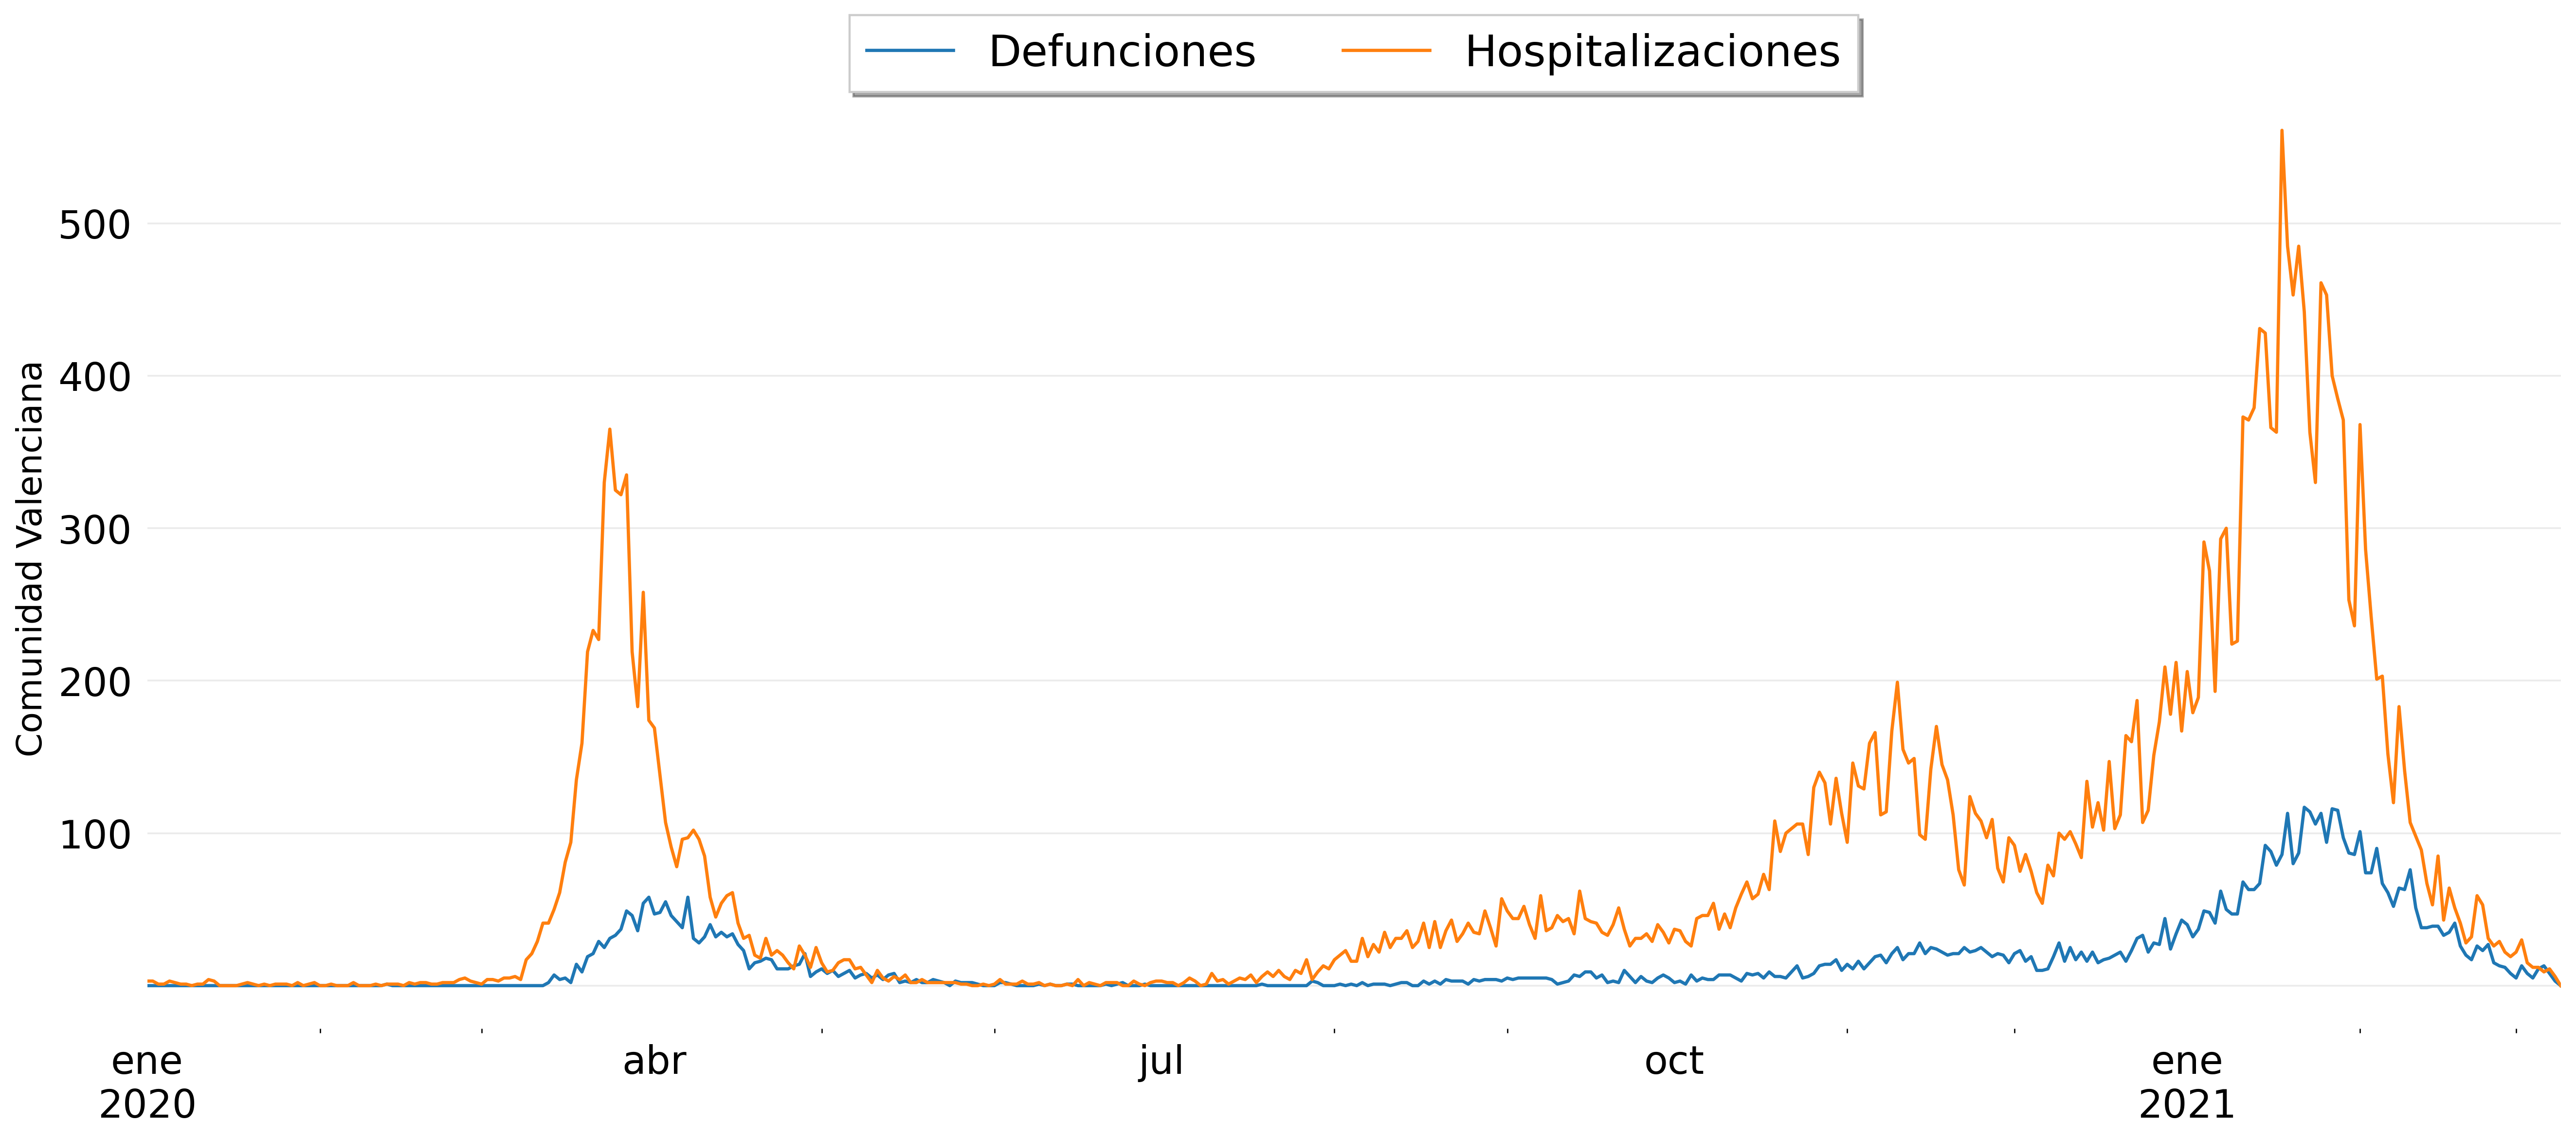

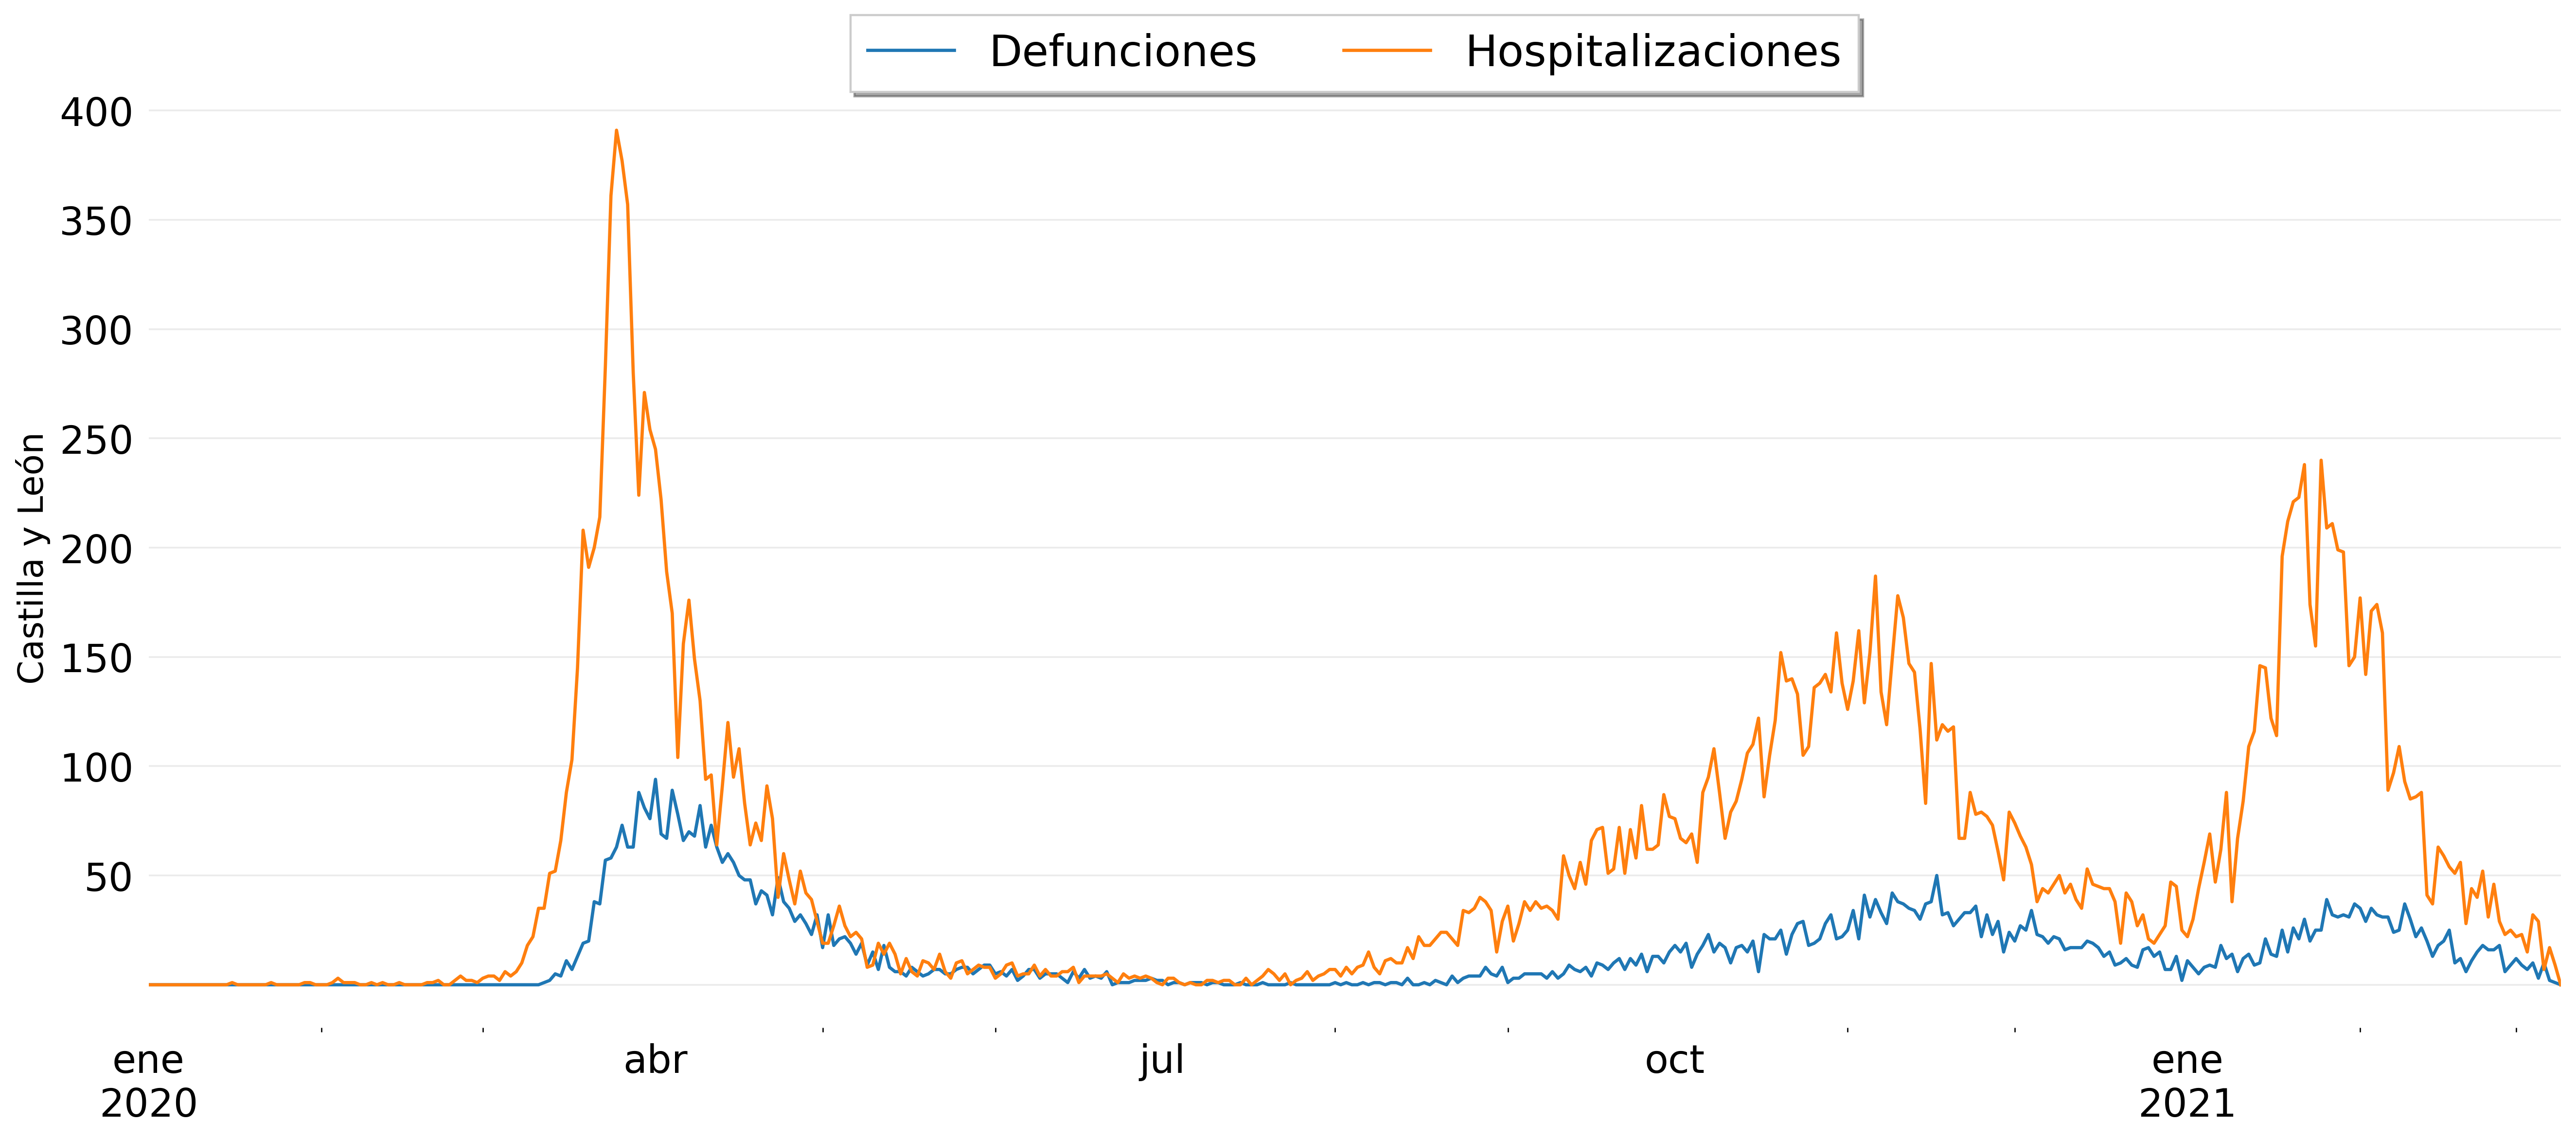

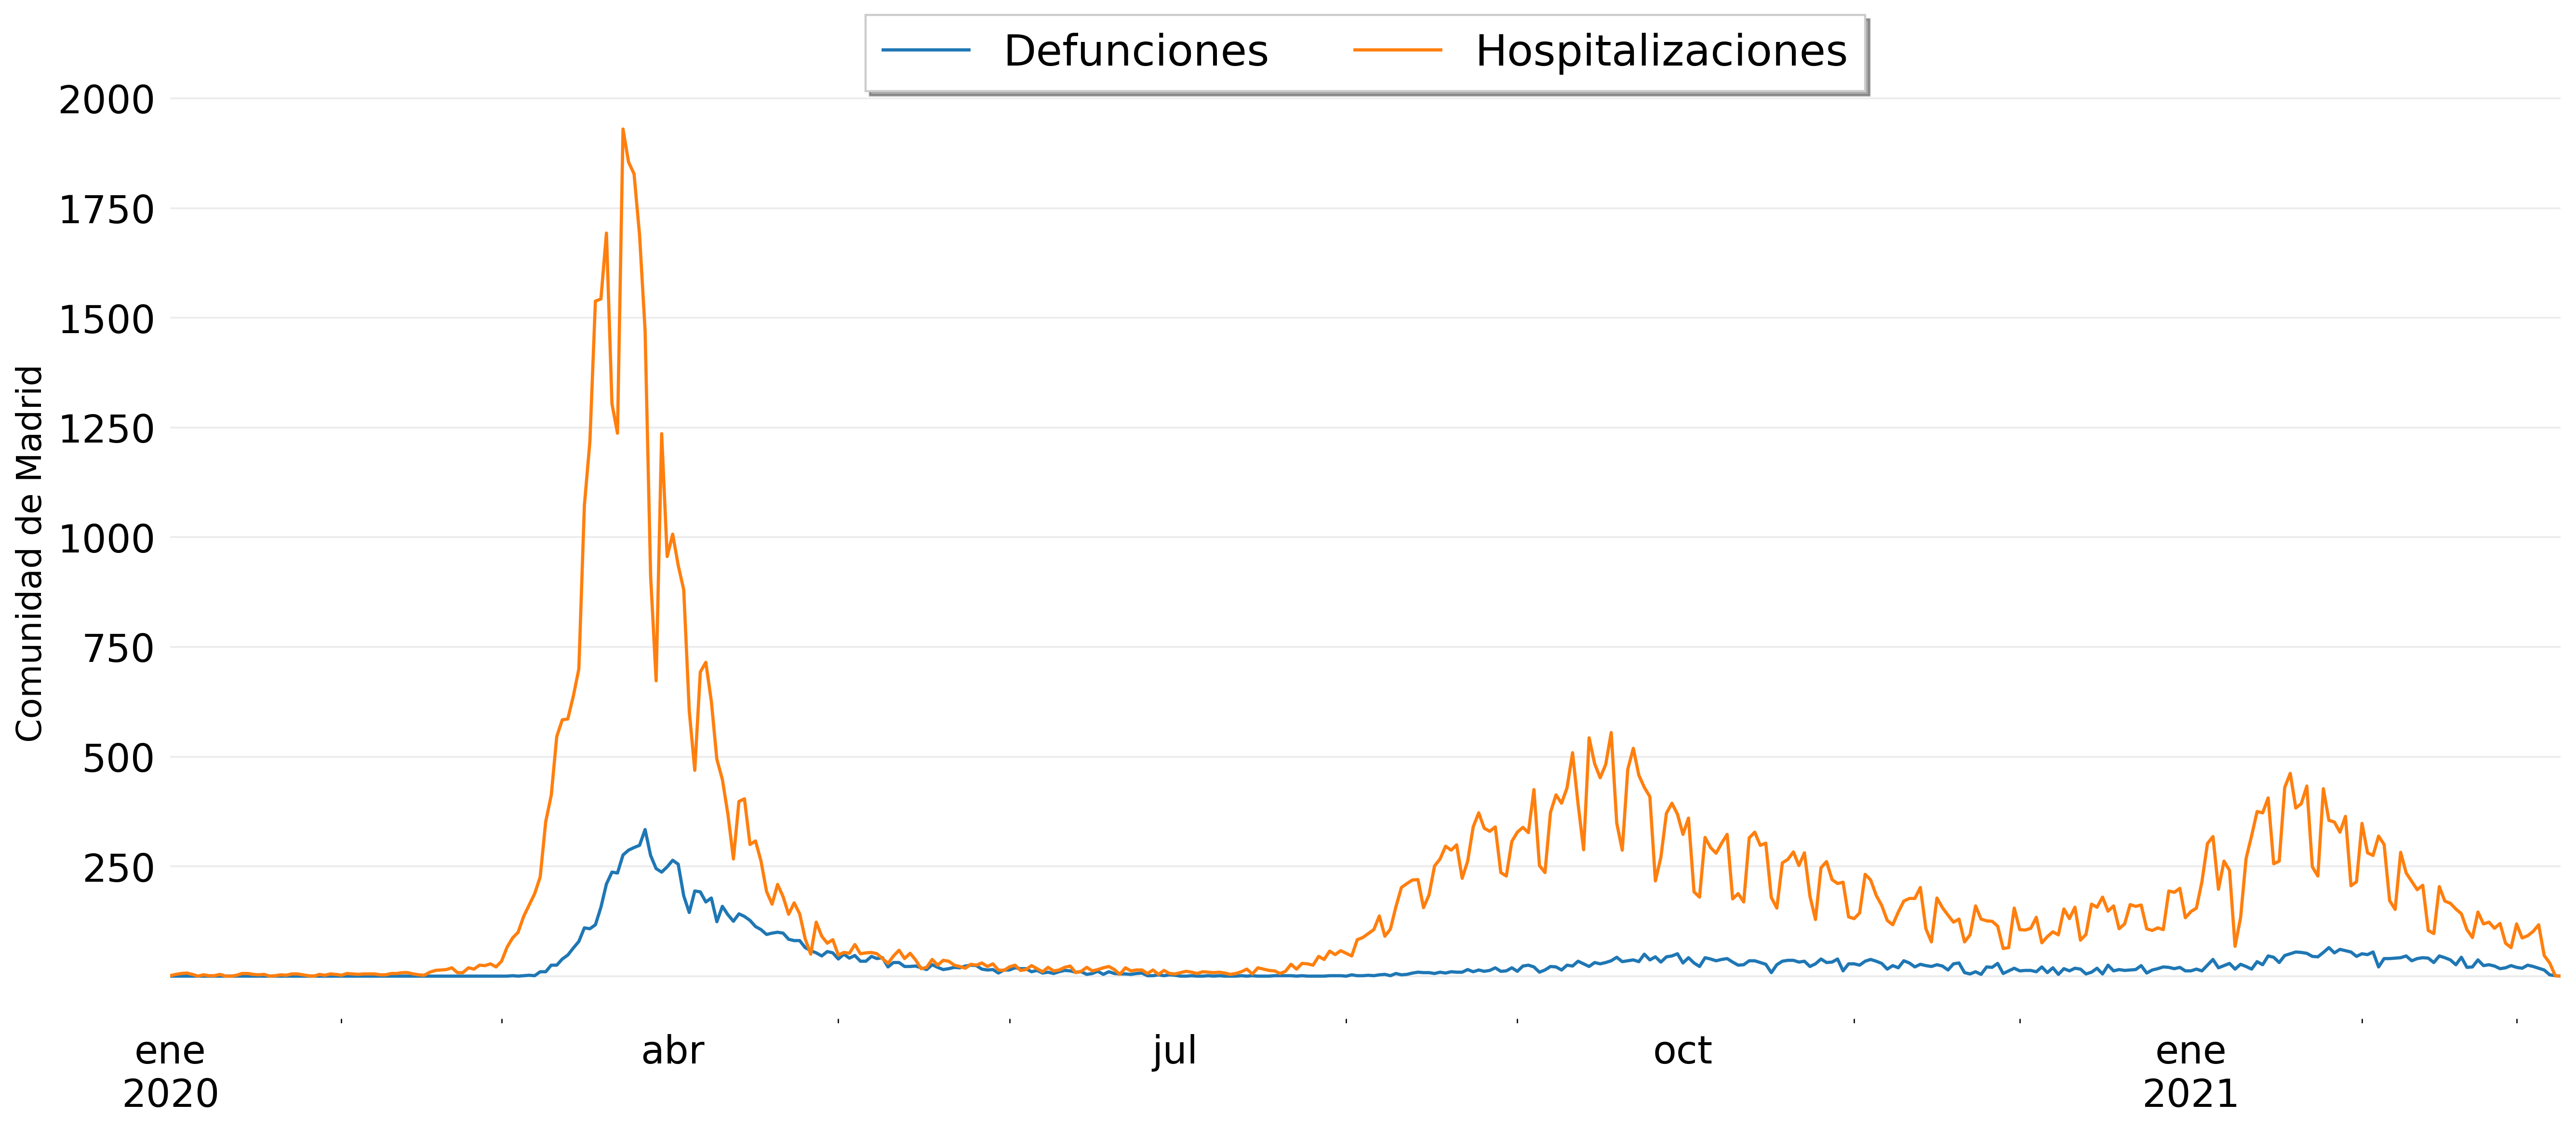

In [6]:
for i in ['Comunidad Valenciana','Castilla y León','Comunidad de Madrid']:
    fig, ax = plt.subplots(figsize=(20,8)
                           , dpi = 320)
        
    Grafico = (df[df.Comunidad == i]
               .groupby('Comunidad')
               .resample('d')
               .agg({'num_casos':'sum'
                     , 'num_hosp':'sum'
                     , 'num_def':'sum'})
               .reset_index(level = 0)
               .pivot(columns = 'Comunidad', values= ['num_def','num_hosp'])
               .set_axis(['Defunciones','Hospitalizaciones'], axis=1)
               .plot(ax=ax, label = ['num_def','num_hosp']))
    
    ax.set_ylabel(i, fontsize = 16)
    nice_axes(ax)
    plt.show()

## Poblacion

In [7]:
url = 'https://www.ine.es/jaxiT3/files/t/es/csv_bdsc/2853.csv?nocab=1'

poblacion = pd.read_csv(url, error_bad_lines=False, sep=';', header=0)

poblacion = poblacion[(poblacion['Comunidades y Ciudades Autónomas'] != 'Total') 
                      & (poblacion['Periodo'] == 2020)].pivot(index = 'Comunidades y Ciudades Autónomas'
                                                             , columns = 'Sexo'
                                                             , values = 'Total')

Tokens_List = sent_tokenize(" ".join(review + '.' for review in comunidades.values()), 'spanish')
matriz = {}

for i in poblacion.index.values:
    matriz[i] = respuesta(i.replace('Balears','Baleares'))[:-1]
            
poblacion.index = poblacion.index.map(matriz)

poblacion.Total = poblacion.Total.str.replace('.','').astype(int)

poblacion = poblacion.Total

poblacion

Comunidades y Ciudades Autónomas
Andalucía                     8464411
Aragón                        1329391
Asturias                      1018784
Islas Baleares                1171543
Canarias                      2175952
Cantabria                      582905
Castilla y León               2394918
Castilla-La Mancha            2045221
Cataluña                      7780479
Comunidad Valenciana          5057353
Extremadura                   1063987
Galicia                       2701819
Comunidad de Madrid           6779888
Región de Murcia              1511251
Comunidad Foral de Navarra     661197
País Vasco                    2220504
La Rioja (España)              319914
Ceuta                           84202
Melilla                         87076
Name: Total, dtype: int64

In [8]:
url = 'https://cnecovid.isciii.es/covid19/resources/casos_tecnica_ccaa.csv'
df = pd.read_csv(url)

df = (df
      .assign(ccaa_iso = df.ccaa_iso.map(comunidades))
      .set_index('ccaa_iso')
      .merge(poblacion, left_index=True, right_index=True)
      .reset_index()
      .set_index('fecha')
      .rename(columns = {'index': 'Comunidad'
                         , 'num_casos': 'Casos'}))

df[df.Comunidad == 'Comunidad Valenciana'].tail(15)['Casos']

fecha
2021-02-23    356
2021-02-24    288
2021-02-25    285
2021-02-26    279
2021-02-27    162
2021-02-28    127
2021-03-01    195
2021-03-02    169
2021-03-03    180
2021-03-04    158
2021-03-05    117
2021-03-06     72
2021-03-07     42
2021-03-08     38
2021-03-09      0
Name: Casos, dtype: int64

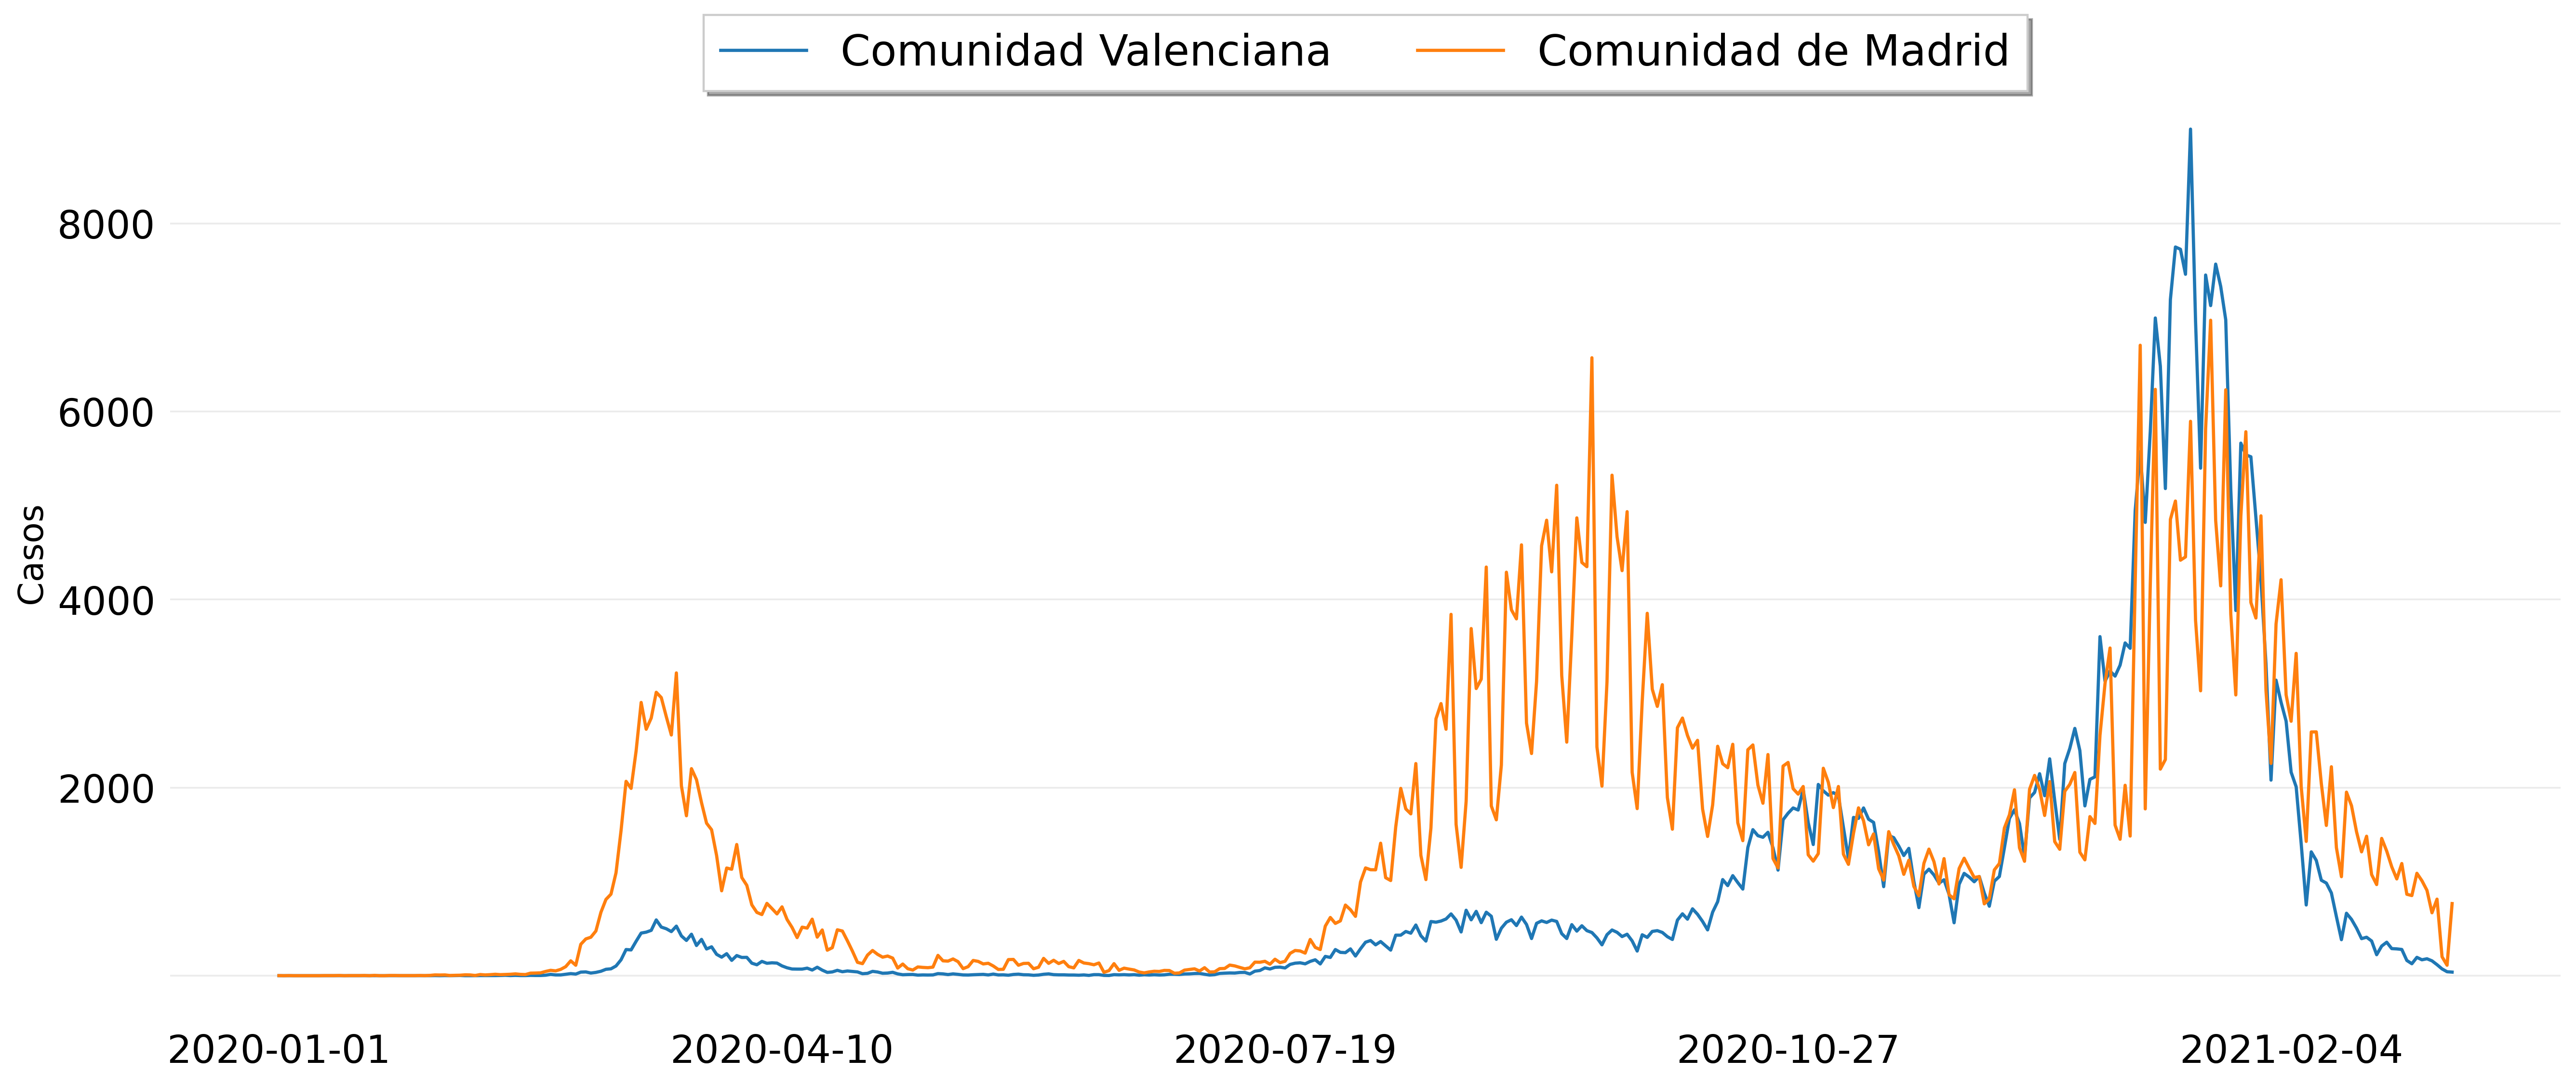

In [9]:
fig, ax = plt.subplots(figsize=(20,8)
                       , dpi = 320)

series = ['Comunidad Valenciana', 'Comunidad de Madrid']
for i in series:
    df[df.Comunidad == i][:-1]['Casos'].plot(label = i)

ax.set_ylabel('Casos', fontsize = 16)
nice_axes(ax)
plt.show()

In [10]:
df2 = (df
       .assign(Incidencia = lambda x: x.Casos / x.Total * 1e5)
       .pivot(columns='Comunidad', values = 'Incidencia')
       .rolling(14).sum()
      )[:-1]

df2.tail()

Comunidad,Andalucía,Aragón,Asturias,Canarias,Cantabria,Castilla y León,Castilla-La Mancha,Cataluña,Ceuta,Comunidad Foral de Navarra,Comunidad Valenciana,Comunidad de Madrid,Extremadura,Galicia,Islas Baleares,La Rioja (España),Melilla,País Vasco,Región de Murcia
fecha,,,,,,,,,,,,,,,,,,,
2021-03-04,126.281675,166.241535,191.797280,105.287249,102.761170,132.280103,84.978592,182.636570,288.591720,121.748889,69.502762,222.511050,44.361444,101.487183,53.348447,73.457242,364.049796,188.335621,79.073562
2021-03-05,123.257247,157.741402,180.509313,104.873637,99.501634,125.014719,80.138039,173.228409,282.653619,120.992684,63.728990,212.643631,42.951653,96.453537,50.360934,69.706234,359.456107,184.958010,76.228237
2021-03-06,118.507951,149.692604,165.982191,102.483878,92.296343,118.500926,76.324270,163.023382,282.653619,121.143925,57.856353,199.752562,42.481722,89.754347,48.141639,68.455898,350.268731,174.014548,73.250572
2021-03-07,114.857372,142.245585,151.160599,97.520534,85.091053,112.738724,73.390602,153.936538,273.152657,115.850495,54.277406,187.097486,40.132069,83.499302,44.983411,65.955225,334.190822,162.350529,69.677373
2021-03-08,103.941078,131.413557,137.320570,91.867835,76.170216,101.256076,66.692059,134.708930,273.152657,107.381007,48.800232,176.876078,38.346333,73.876155,40.459462,62.204217,329.597134,149.875884,63.325020


In [11]:
df2.loc[df2.index.max()].sort_values()

Comunidad
Extremadura                    38.346333
Islas Baleares                 40.459462
Comunidad Valenciana           48.800232
La Rioja (España)              62.204217
Región de Murcia               63.325020
Castilla-La Mancha             66.692059
Galicia                        73.876155
Cantabria                      76.170216
Canarias                       91.867835
Castilla y León               101.256076
Andalucía                     103.941078
Comunidad Foral de Navarra    107.381007
Aragón                        131.413557
Cataluña                      134.708930
Asturias                      137.320570
País Vasco                    149.875884
Comunidad de Madrid           176.876078
Ceuta                         273.152657
Melilla                       329.597134
Name: 2021-03-08, dtype: float64

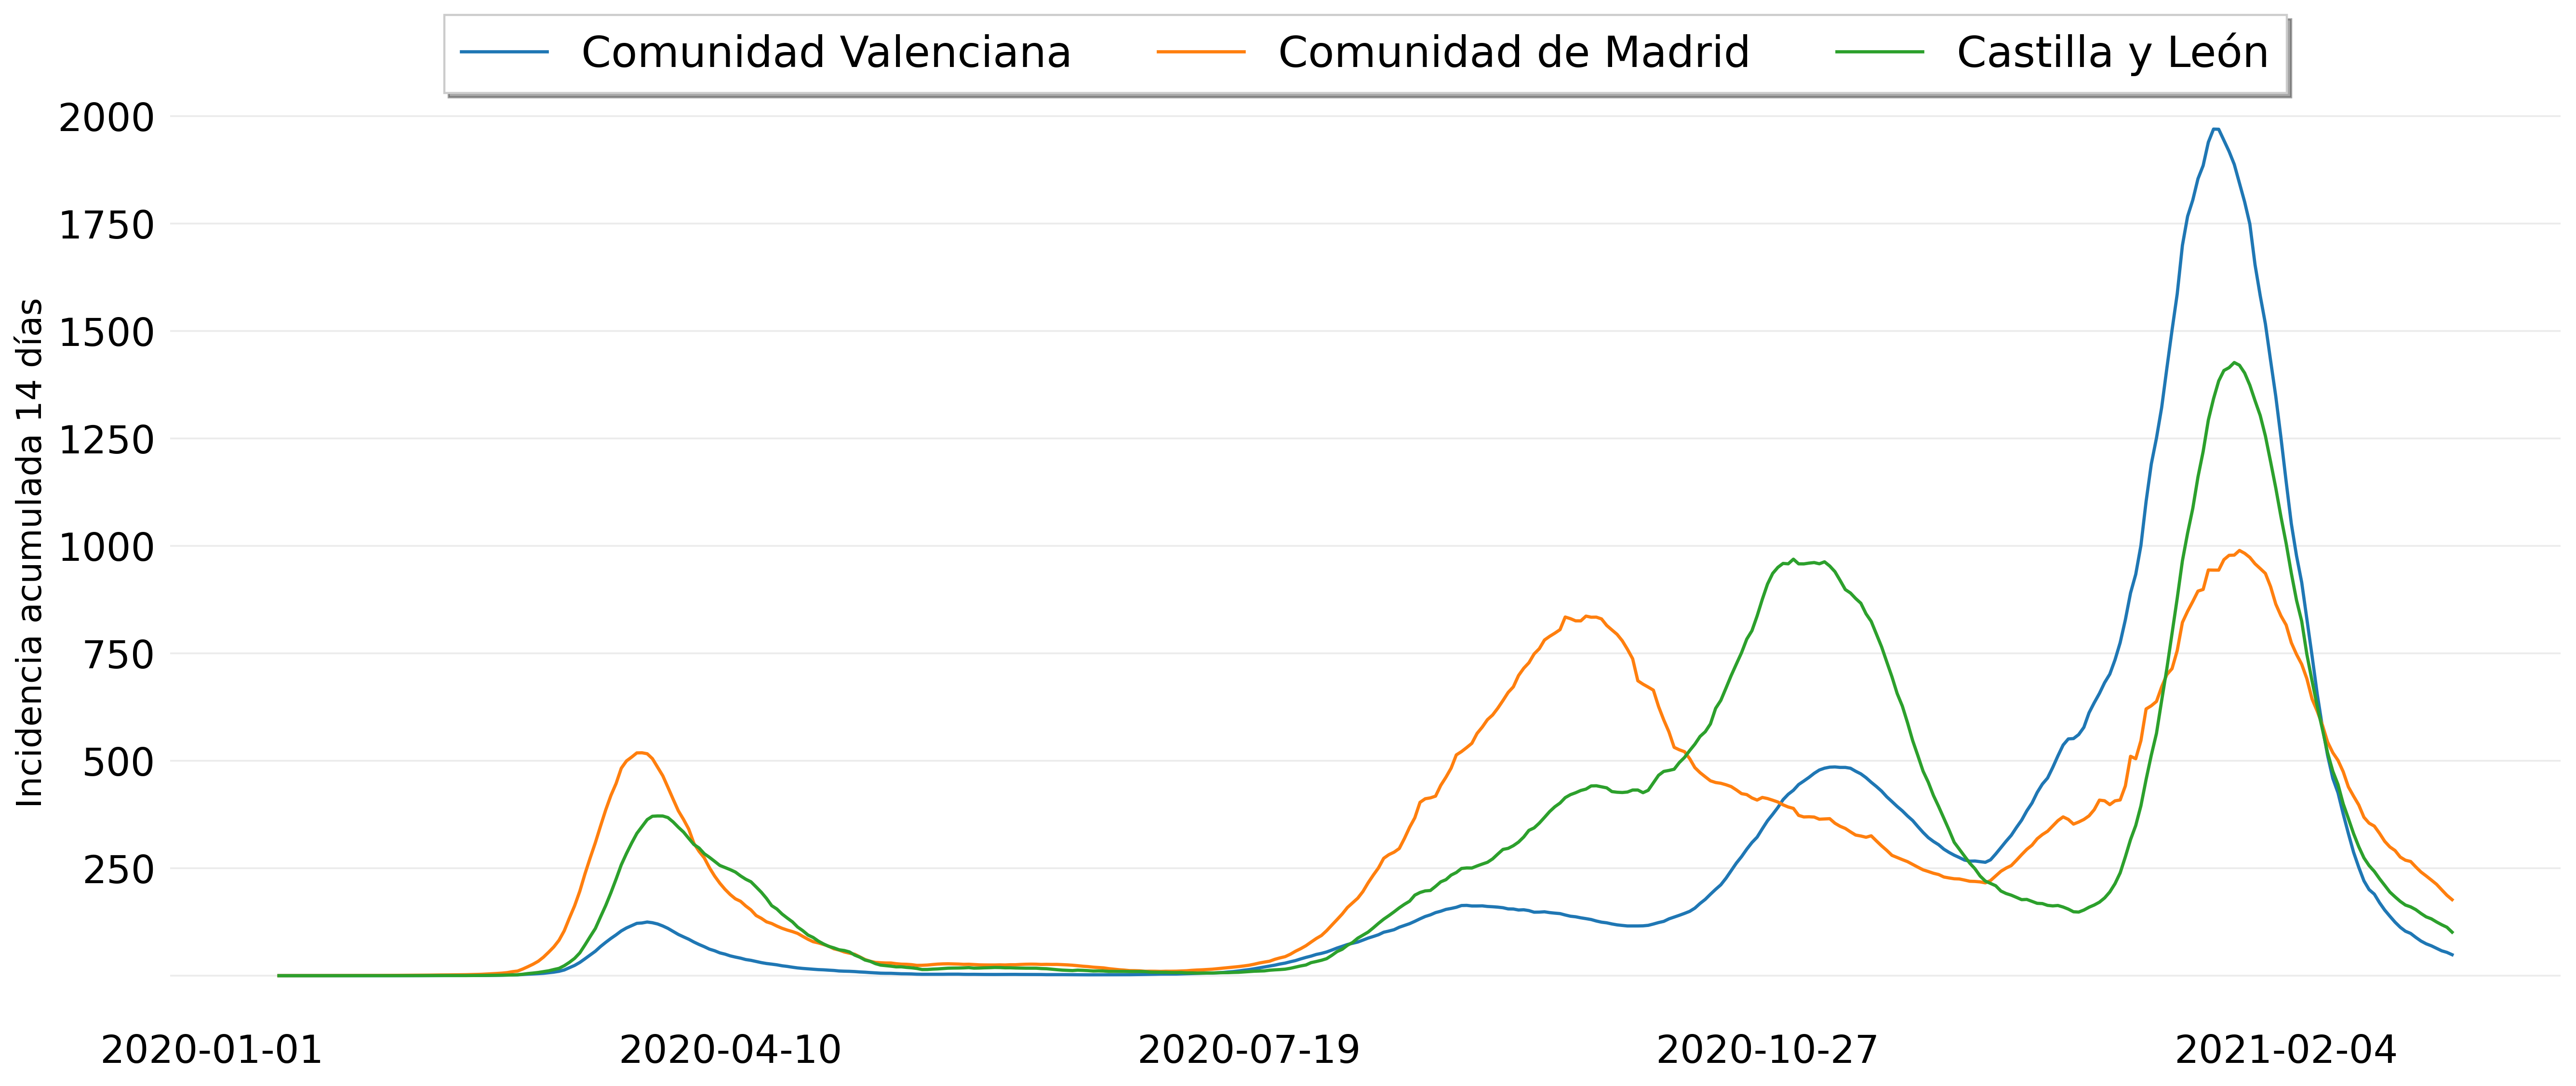

In [12]:
series.append('Castilla y León')

fig, ax = plt.subplots(figsize=(20,8)
                       , dpi = 320)

for i in series:
    df2[i].plot()

ax.set_ylabel('Incidencia acumulada 14 días', fontsize = 16)
nice_axes(ax)
plt.show()

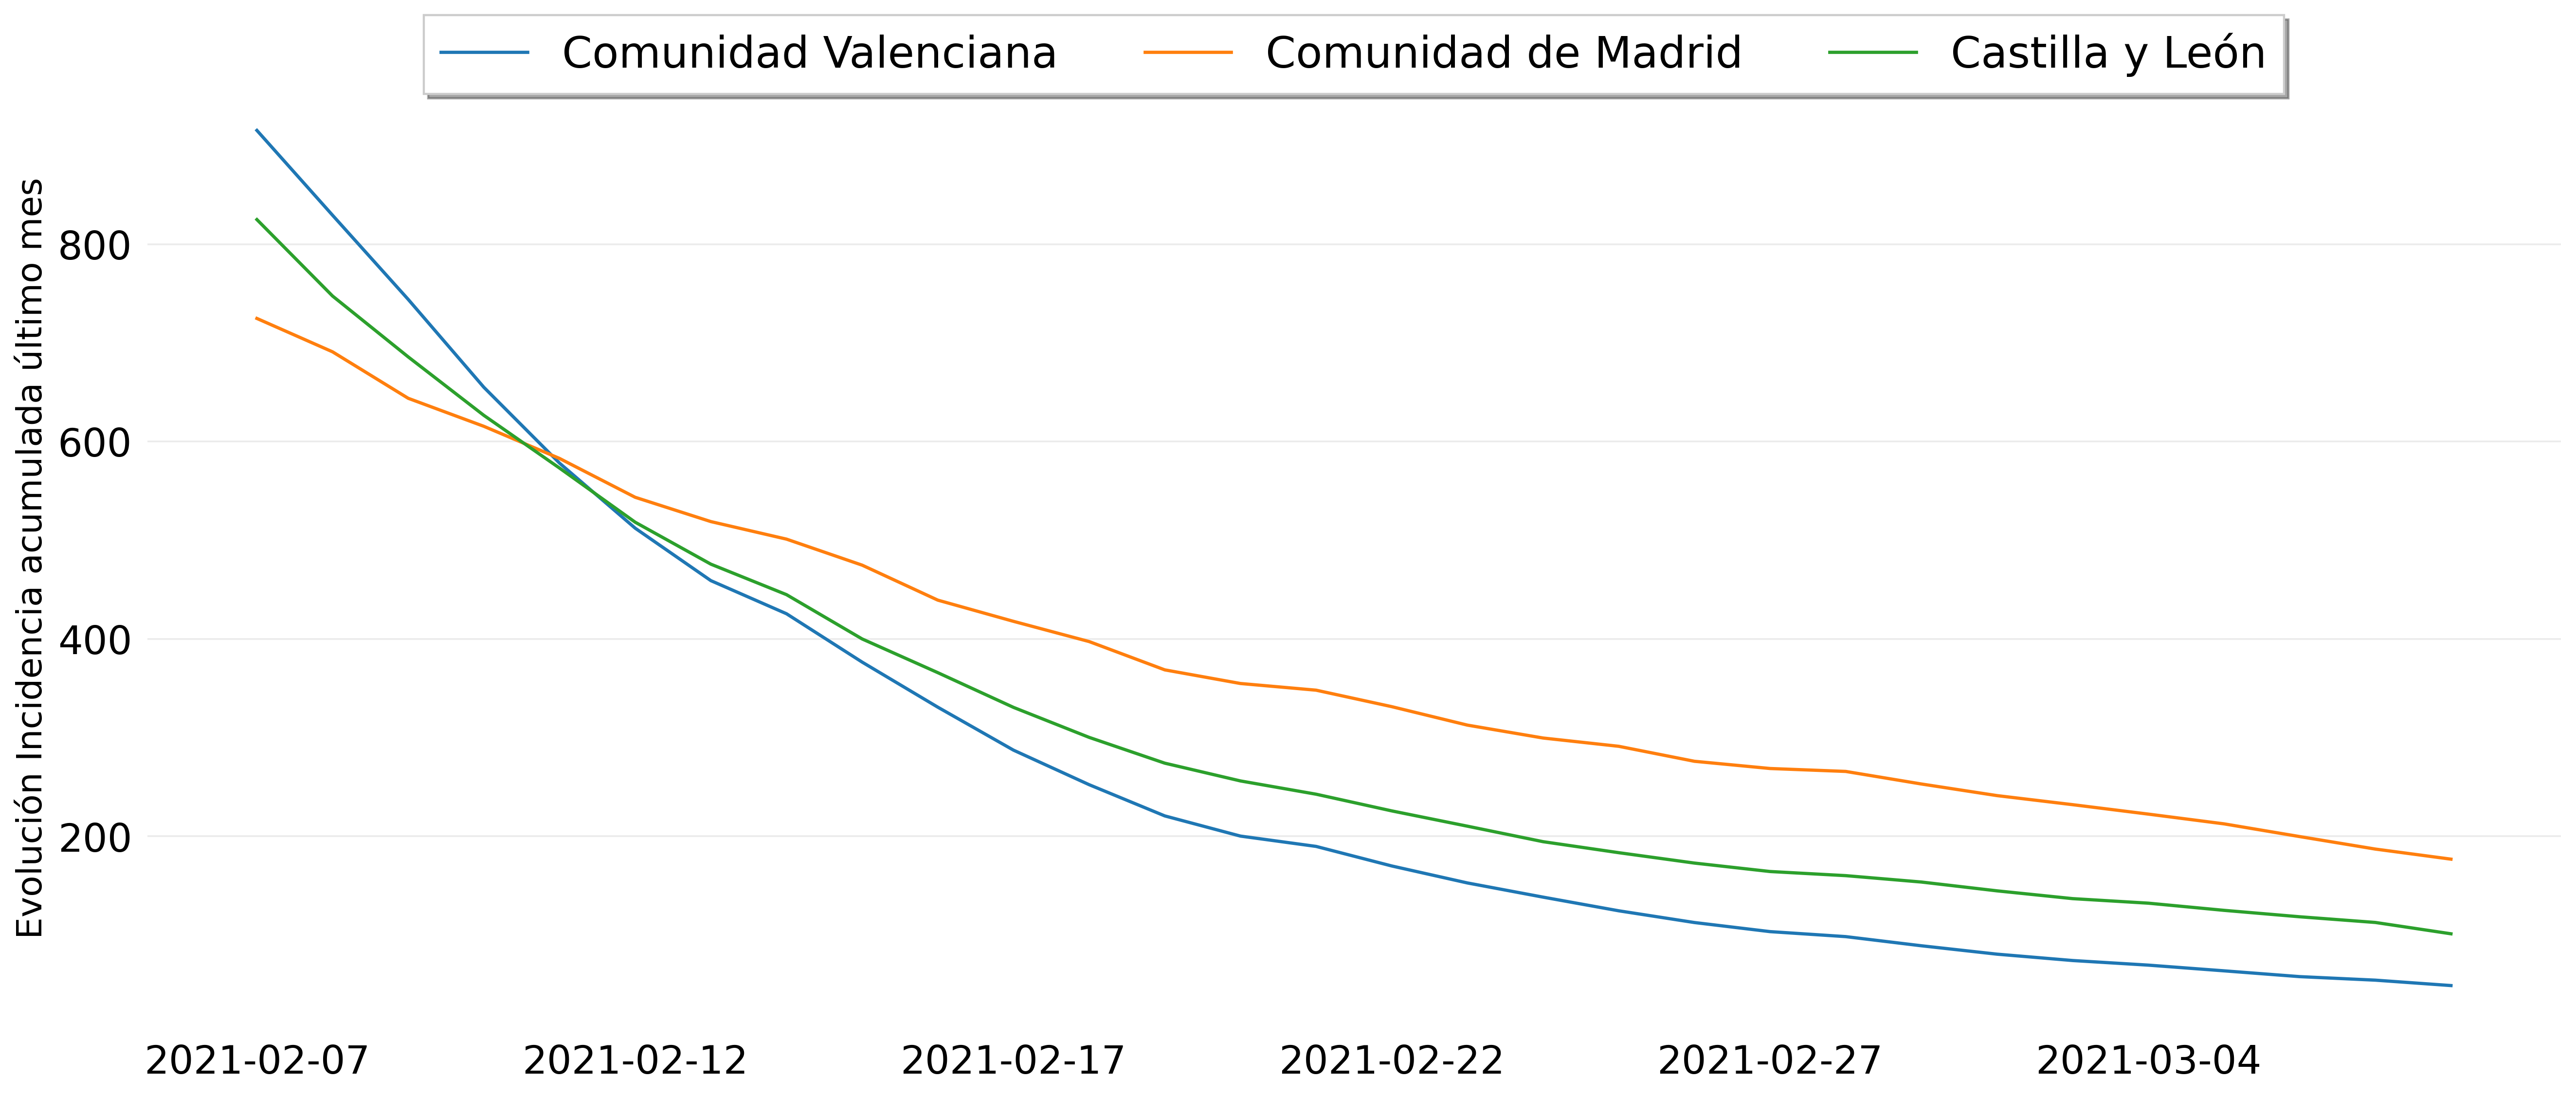

In [13]:
fig, ax = plt.subplots(figsize=(20,8)
                       , dpi = 320)

for i in series:
    df2[-30:][i].plot()

ax.set_ylabel('Evolución Incidencia acumulada último mes', fontsize = 16)
nice_axes(ax)